In [1]:
import pandas as pd
import numpy as np
import gc
import lightgbm as lgb
import pickle
from bayes_opt import BayesianOptimization
from sklearn import metrics, model_selection

In [2]:
X = pd.read_csv("X.csv")
X.drop(columns="Unnamed: 0", inplace=True)
X

vect_bert_0  vect_bert_1  vect_bert_2  vect_bert_3  vect_bert_4  \
0        -0.063658     0.339912    -0.010163    -0.013923    -0.123153   
1        -0.118555    -0.148261     0.160302    -0.386821    -0.726774   
2        -0.316459    -0.294504     0.184219    -0.213133    -0.531769   
3         0.022450     0.172614    -0.358475    -0.109289    -0.941394   
4         0.124644     0.201385    -0.139167    -0.012714    -0.482571   
...            ...          ...          ...          ...          ...   
38688     0.067974     0.317148     0.184514    -0.149185    -0.256625   
38689     0.539846     0.330822     0.228602     0.028706     0.083845   
38690    -0.155075     0.131392    -0.118309    -0.226894    -0.577518   
38691     0.264989     0.219962     0.043999     0.088513    -0.265963   
38692    -0.069044     0.172946    -0.321269     0.040628    -0.415924   

       vect_bert_5  vect_bert_6  vect_bert_7  vect_bert_8  vect_bert_9  ...  \
0        -0.014710     0.311273     0.331206    -0.099549     0.028019  ...   
1        -0.562822     0.874680     0.370453     0.250136    -0.301115  ...   
2        -0.171741     0.527072     0.540711     0.177449    -0.228490  ...   
3        -0.662290     0.867573     0.310960     0.123377    -0.545132  ...   
4        -0.390532     0.491540     0.406687    -0.132009    -0.036235  ...   
...            ...          ...          ...          ...          ...  ...   
38688    -0.720797     0.453054     0.451577    -0.084542    -0.135676  ...   
38689    -0.254513     0.122064     0.275884    -0.310325    -0.076228  ...   
38690    -0.069132     0.390130     0.390238     0.013971    -0.198836  ...   
38691    -0.590887     0.205142     0.509467    -0.121082     0.066158  ...   
38692    -0.168502     0.399717     0.904567    -0.171675     0.102415  ...   

       vect_bert_763  vect_bert_764  vect_bert_765  vect_bert_766  \
0          -0.077076      -0.140186      -0.323338       0.221309   
1          -0.134894      -0.428224      -0.544845       0.497221   
2          -0.068777      -0.427228      -0.250514       0.138782   
3           0.331555      -0.381800      -0.458726       0.518208   
4           0.226968      -0.272881      -0.398541       0.120810   
...              ...            ...            ...            ...   
38688      -0.072568      -0.226486      -0.210059       0.265597   
38689       0.111085       0.056124      -0.188151       0.310611   
38690       0.313569       0.171477      -0.032904       0.376038   
38691       0.217598      -0.118008      -0.277506       0.675446   
38692       0.007299      -0.168268      -0.230035       1.114756   

       vect_bert_767  vect_cut  interrogation_nb  exclamation_nb  length  \
0           0.056351         0                 0               0      44   
1           0.274973         0                 1               0     319   
2           0.811133         0                 0               2      57   
3           0.251175         1                 1               7     648   
4           0.362787         0                 0               1      40   
...              ...       ...               ...             ...     ...   
38688       0.391451         0                 0               3      25   
38689       0.425706         0                 0               0      46   
38690       0.558118         0                 1               0     213   
38691       0.610123         0                 0               1    1925   
38692       0.267523         0                 0               0     137   

       upper_nb  
0            37  
1            43  
2             3  
3            22  
4            31  
...         ...  
38688        18  
38689         2  
38690         6  
38691       223  
38692       109  

[38693 rows x 773 columns]

In [3]:
y = pd.read_csv("y.csv")
y.drop(columns="Unnamed: 0", inplace=True)
y

y
0      0.494473
1      0.052135
2      0.046112
3      0.484739
4      0.229616
...         ...
38688  0.187180
38689  0.119898
38690  0.046700
38691  0.088663
38692  0.224616

[38693 rows x 1 columns]

In [4]:
# séparation train et valid set

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, y, test_size=0.2, 
                                                                      random_state=123)
del X, y
gc.collect()

4

In [6]:
cat_features = ["vect_cut"]

lgbm_reg = lgb.LGBMRegressor(
        n_jobs=-1,
        n_estimators=10000,
        learning_rate=0.02,
        num_leaves=37,
        colsample_bytree=0.1,
        subsample=0.9671481248287275,
        max_depth=5,
        reg_alpha=0.11597178726549835,
        reg_lambda=0.001,
        min_split_gain=0.001,
        min_child_weight=24.08701572034871,
        silent=-1,
        verbose=-1,
        random_state=123,
        categorical_feature=list(np.where(train_x.columns.isin(cat_features))[0]))

lgbm_reg.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
    eval_metric="rmse", verbose= 200, early_stopping_rounds= 200)

Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 0.109364	training's l2: 0.0119605	valid_1's rmse: 0.117505	valid_1's l2: 0.0138074
[400]	training's rmse: 0.0997252	training's l2: 0.00994512	valid_1's rmse: 0.113448	valid_1's l2: 0.0128705
[600]	training's rmse: 0.0934887	training's l2: 0.00874014	valid_1's rmse: 0.111865	valid_1's l2: 0.0125137
[800]	training's rmse: 0.0886487	training's l2: 0.00785859	valid_1's rmse: 0.111074	valid_1's l2: 0.0123375
[1000]	training's rmse: 0.0843849	training's l2: 0.00712081	valid_1's rmse: 0.110376	valid_1's l2: 0.0121829
[1200]	training's rmse: 0.0807361	training's l2: 0.00651832	valid_1's rmse: 0.109988	valid_1's l2: 0.0120974
[1400]	training's rmse: 0.0773074	training's l2: 0.00597643	valid_1's rmse: 0.109662	valid_1's l2: 0.0120259
[1600]	training's rmse: 0.0742102	training's l2: 0.00550716	valid_1's rmse: 0.109412	valid_1's l2: 0.0119711
[1800]	training's rmse: 0.0713043	training's l2: 0.00508431	valid_1's rm

LGBMRegressor(categorical_feature=[768], colsample_bytree=0.1,
              learning_rate=0.02, max_depth=5,
              min_child_weight=24.08701572034871, min_split_gain=0.001,
              n_estimators=10000, num_leaves=37, random_state=123,
              reg_alpha=0.11597178726549835, reg_lambda=0.001, silent=-1,
              subsample=0.9671481248287275, verbose=-1)

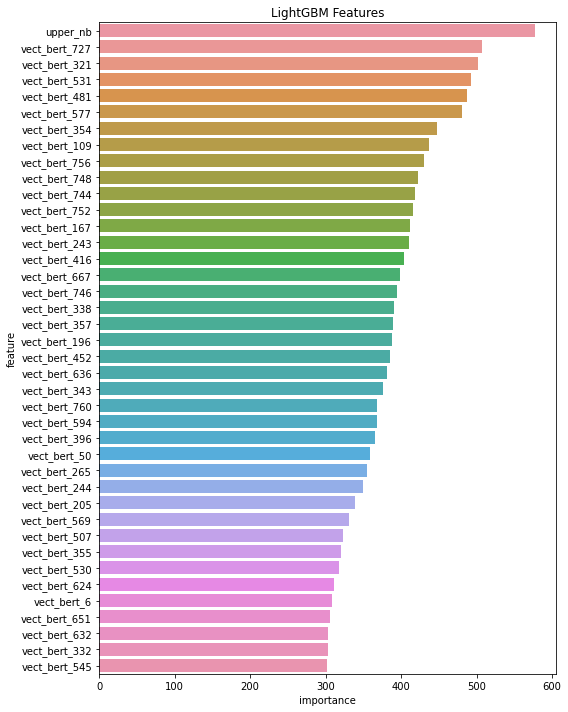

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = train_x.columns
feature_importance_df["importance"] = lgbm_reg.feature_importances_
best_features_idx = feature_importance_df.sort_values(by="importance", ascending=False)[:40].index
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="feature", data=feature_importance_df.iloc[best_features_idx].sort_values(by="importance", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()

In [21]:
to_score = pd.read_csv("to_score.csv")
submission = to_score[["comment_id", "text"]]
to_score.drop(columns=["comment_id", "text"], inplace=True)
to_score

vect_bert_0  vect_bert_1  vect_bert_2  vect_bert_3  vect_bert_4  \
0        0.143652     0.292070    -0.533055    -0.101270    -0.495491   
1       -0.171063    -0.077769     0.221514    -0.137623    -0.322055   
2       -0.251452    -0.027972    -0.274355    -0.448275    -0.271484   
3       -0.429944    -0.403732    -0.114185    -0.325715    -0.084341   
4        0.212798     0.207547    -0.176383    -0.012524    -0.453265   
...           ...          ...          ...          ...          ...   
7532    -0.133650     0.278852     0.050428    -0.295549    -0.262903   
7533    -0.160853     0.316544    -0.157776    -0.125652    -0.364917   
7534     0.228314     0.197434    -0.143114    -0.224541     0.111592   
7535     0.140433     0.265844     0.075373    -0.497088    -0.329253   
7536    -0.004931     0.074858    -0.121562    -0.436629    -0.396202   

      vect_bert_5  vect_bert_6  vect_bert_7  vect_bert_8  vect_bert_9  ...  \
0       -0.292188     0.043107     0.620656    -0.057696    -0.150754  ...   
1       -0.219494     0.565815     0.751411     0.486684    -0.135245  ...   
2       -0.510581     0.630092     0.717140     0.343150    -0.346035  ...   
3       -0.565741     0.403450     0.437924     0.176423    -0.049817  ...   
4       -0.579027     0.066561     0.468431    -0.013359    -0.184338  ...   
...           ...          ...          ...          ...          ...  ...   
7532    -0.397456     0.679998     0.544847    -0.066642    -0.000281  ...   
7533    -0.621989     0.551854     0.479463     0.188096    -0.374337  ...   
7534    -0.341189     0.237498     0.071860     0.260961    -0.478406  ...   
7535    -0.387200     0.780998     0.502237    -0.065318    -0.378377  ...   
7536    -0.420791     0.668754     0.486574     0.026226    -0.333251  ...   

      vect_bert_763  vect_bert_764  vect_bert_765  vect_bert_766  \
0          0.265629      -0.178735      -0.118630       0.248695   
1         -0.134481      -0.520386      -0.320839       0.271344   
2          0.050174       0.046618      -0.416978       0.724673   
3         -0.159946      -0.475485      -0.252396       0.567604   
4         -0.054865      -0.098359      -0.051432       0.291154   
...             ...            ...            ...            ...   
7532      -0.103962       0.007943      -0.358823       0.232434   
7533       0.134400      -0.032274      -0.603294       0.465396   
7534       0.013592      -0.253797      -0.059550       0.331790   
7535       0.086896      -0.105071      -0.257607       0.485052   
7536       0.398936      -0.016655      -0.491940       0.578521   

      vect_bert_767  vect_cut  length  exclamation_nb  interrogation_nb  \
0          0.582694         1     698               0                 0   
1          0.479531         0      70               0                 1   
2          0.583471         0     426               1                 2   
3          0.761989         1    1692               0                 1   
4          0.669421         0     149               0                 0   
...             ...       ...     ...             ...               ...   
7532       0.548142         0      29               0                 0   
7533       0.404627         0      24               0                 0   
7534       0.433508         1     735               0                 0   
7535       0.511353         0      76               1                 0   
7536       0.600857         0      91               0                 0   

      upper_nb  
0           12  
1            1  
2           11  
3           48  
4            3  
...        ...  
7532         1  
7533         1  
7534        17  
7535         2  
7536         6  

[7537 rows x 773 columns]

In [22]:
y_pred = lgbm_reg.predict(to_score, num_iteration=lgbm_reg.best_iteration_)
print(len(y_pred))
y_pred

7537


array([-0.01192967, -0.02760071, -0.00056356, ...,  0.01115712,
        0.07892426,  0.02688676])

In [27]:
submission["score"]=y_pred
submission.drop(columns=["text"], inplace=True)

<ipython-input-27-4b5462a0cad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["score"]=y_pred
/home/samuel/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
submission

comment_id     score
0         114890 -0.011930
1         732895 -0.027601
2        1139051 -0.000564
3        1434512 -0.003971
4        2084821  0.050871
...          ...       ...
7532   504235362  0.165510
7533   504235566  0.139717
7534   504308177  0.011157
7535   504570375  0.078924
7536   504598250  0.026887

[7537 rows x 2 columns]

In [29]:
submission.to_csv("submission.csv", index=False)

In [30]:
pickle.dump(lgbm_reg, open("lgbm_bert.pkl", "wb"))